In [1]:
import sys; sys.path.insert(0,'..')
from hashstash import *
logger.setLevel(logging.INFO)
from hashstash.profilers.engine_profiler import *

In [119]:
df=HashStashProfiler.run_profiles(**opts_all)

In [133]:
import plotnine as p9
import pandas as pd
p9.options.dpi = 300
p9.options.figure_size = (8, 7)
# fig=p9.ggplot(dfx[dfx.Serializer!='pickle'], p9.aes(x='Label', y='Rate (it/s)', fill='Engine')) + p9.geom_bar(stat='identity') + p9.theme_classic() + p9.labs(y=' Rate (it/s)', x='Label') + p9.theme(axis_text_x=p9.element_text(angle=45, hjust=1, size=8), axis_text_y=p9.element_text(size=8)) + p9.coord_flip() 
# fig

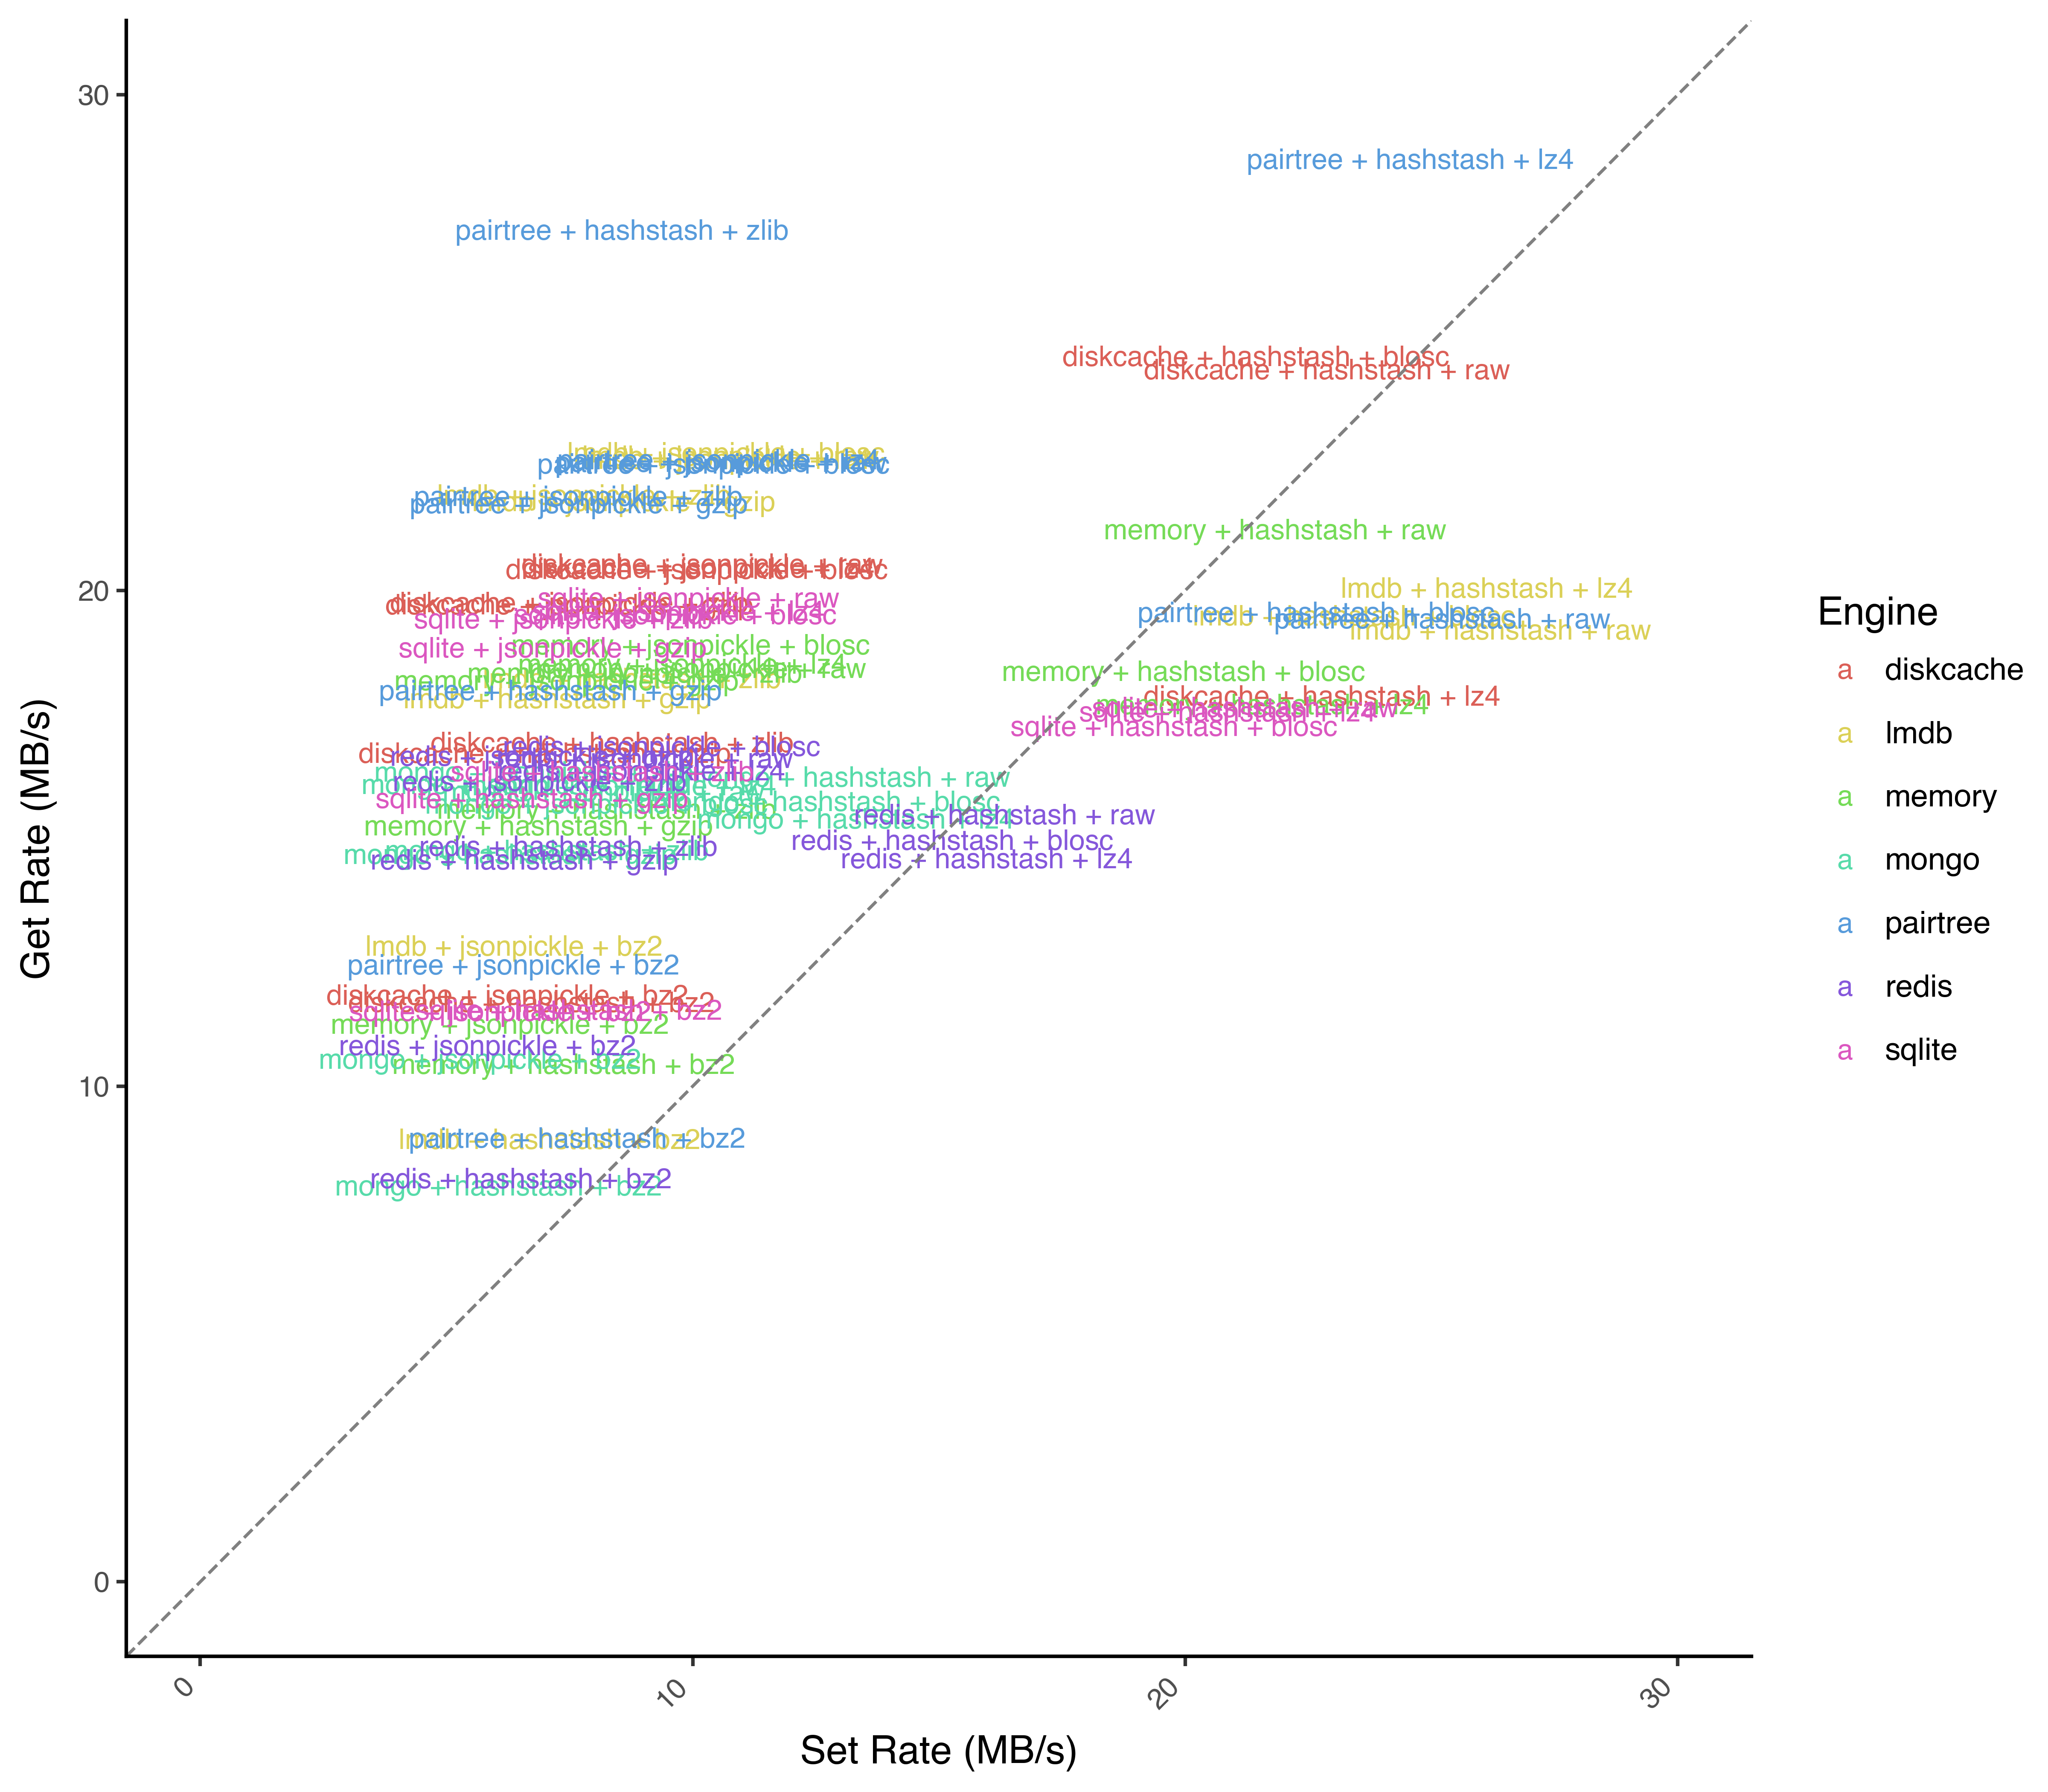

In [157]:
gby = ['Engine','Serializer','Encoding']
dfx = df.groupby(gby).median(numeric_only=True).reset_index()
# dfx=dfx[dfx.Encoding.isin({'lz4+b64'})]
dfx['Label'] = dfx['Engine']+ ' + ' + dfx['Serializer'] + ' + ' + dfx['Encoding']
dfx['Rate (it/s)'] = 1 / (dfx['Set Time (s)'] + dfx['Get Time (s)'])
dfx['Rate (MB/s)'] = dfx['Raw Size (B)'] / (dfx['Set Time (s)'] + dfx['Get Time (s)']) / 1024 / 1024
dfx['Set Rate (it/s)'] = 1 / dfx['Set Time (s)']
dfx['Set Rate (MB/s)'] = dfx['Raw Size (B)'] / dfx['Set Time (s)'] / 1024 / 1024
dfx['Get Rate (it/s)'] = 1 / dfx['Get Time (s)']
dfx['Get Rate (MB/s)'] = dfx['Raw Size (B)'] / dfx['Get Time (s)'] / 1024 / 1024
# dfx['Compression Ratio'] = 1- dfx['Encoded Size (B)'] / dfx['Size (B)']
dfx['Label'] = dfx['Label'].str.replace('+b64', '')
dfx = dfx.sort_values('Rate (it/s)', ascending=True)
dfx['Label'] = pd.Categorical(dfx['Label'], categories=dfx['Label'].unique())

figdf=dfx
figdf=figdf[figdf.Serializer!="pickle"]
figdf=figdf[figdf.Engine!="dataframe"]
# figdf=figdf[figdf.Encoding.isin({"lz4+b64","raw+b64"})]
fig=p9.ggplot(figdf, p9.aes(x='Set Rate (MB/s)', y='Get Rate (MB/s)', color='Engine', label='Label')) + p9.geom_text(size=8) + p9.theme_classic() + p9.labs() + p9.theme(axis_text_x=p9.element_text(angle=45, hjust=1, size=8), axis_text_y=p9.element_text(size=8))
fig+=p9.scale_y_continuous(limits=(0,30))
fig+=p9.scale_x_continuous(limits=(0,30))
# fig+=p9.scale_y_log10()
# fig+=p9.scale_x_log10()
fig += p9.geom_abline(slope=1, intercept=0, linetype='dashed', color='gray')
fig

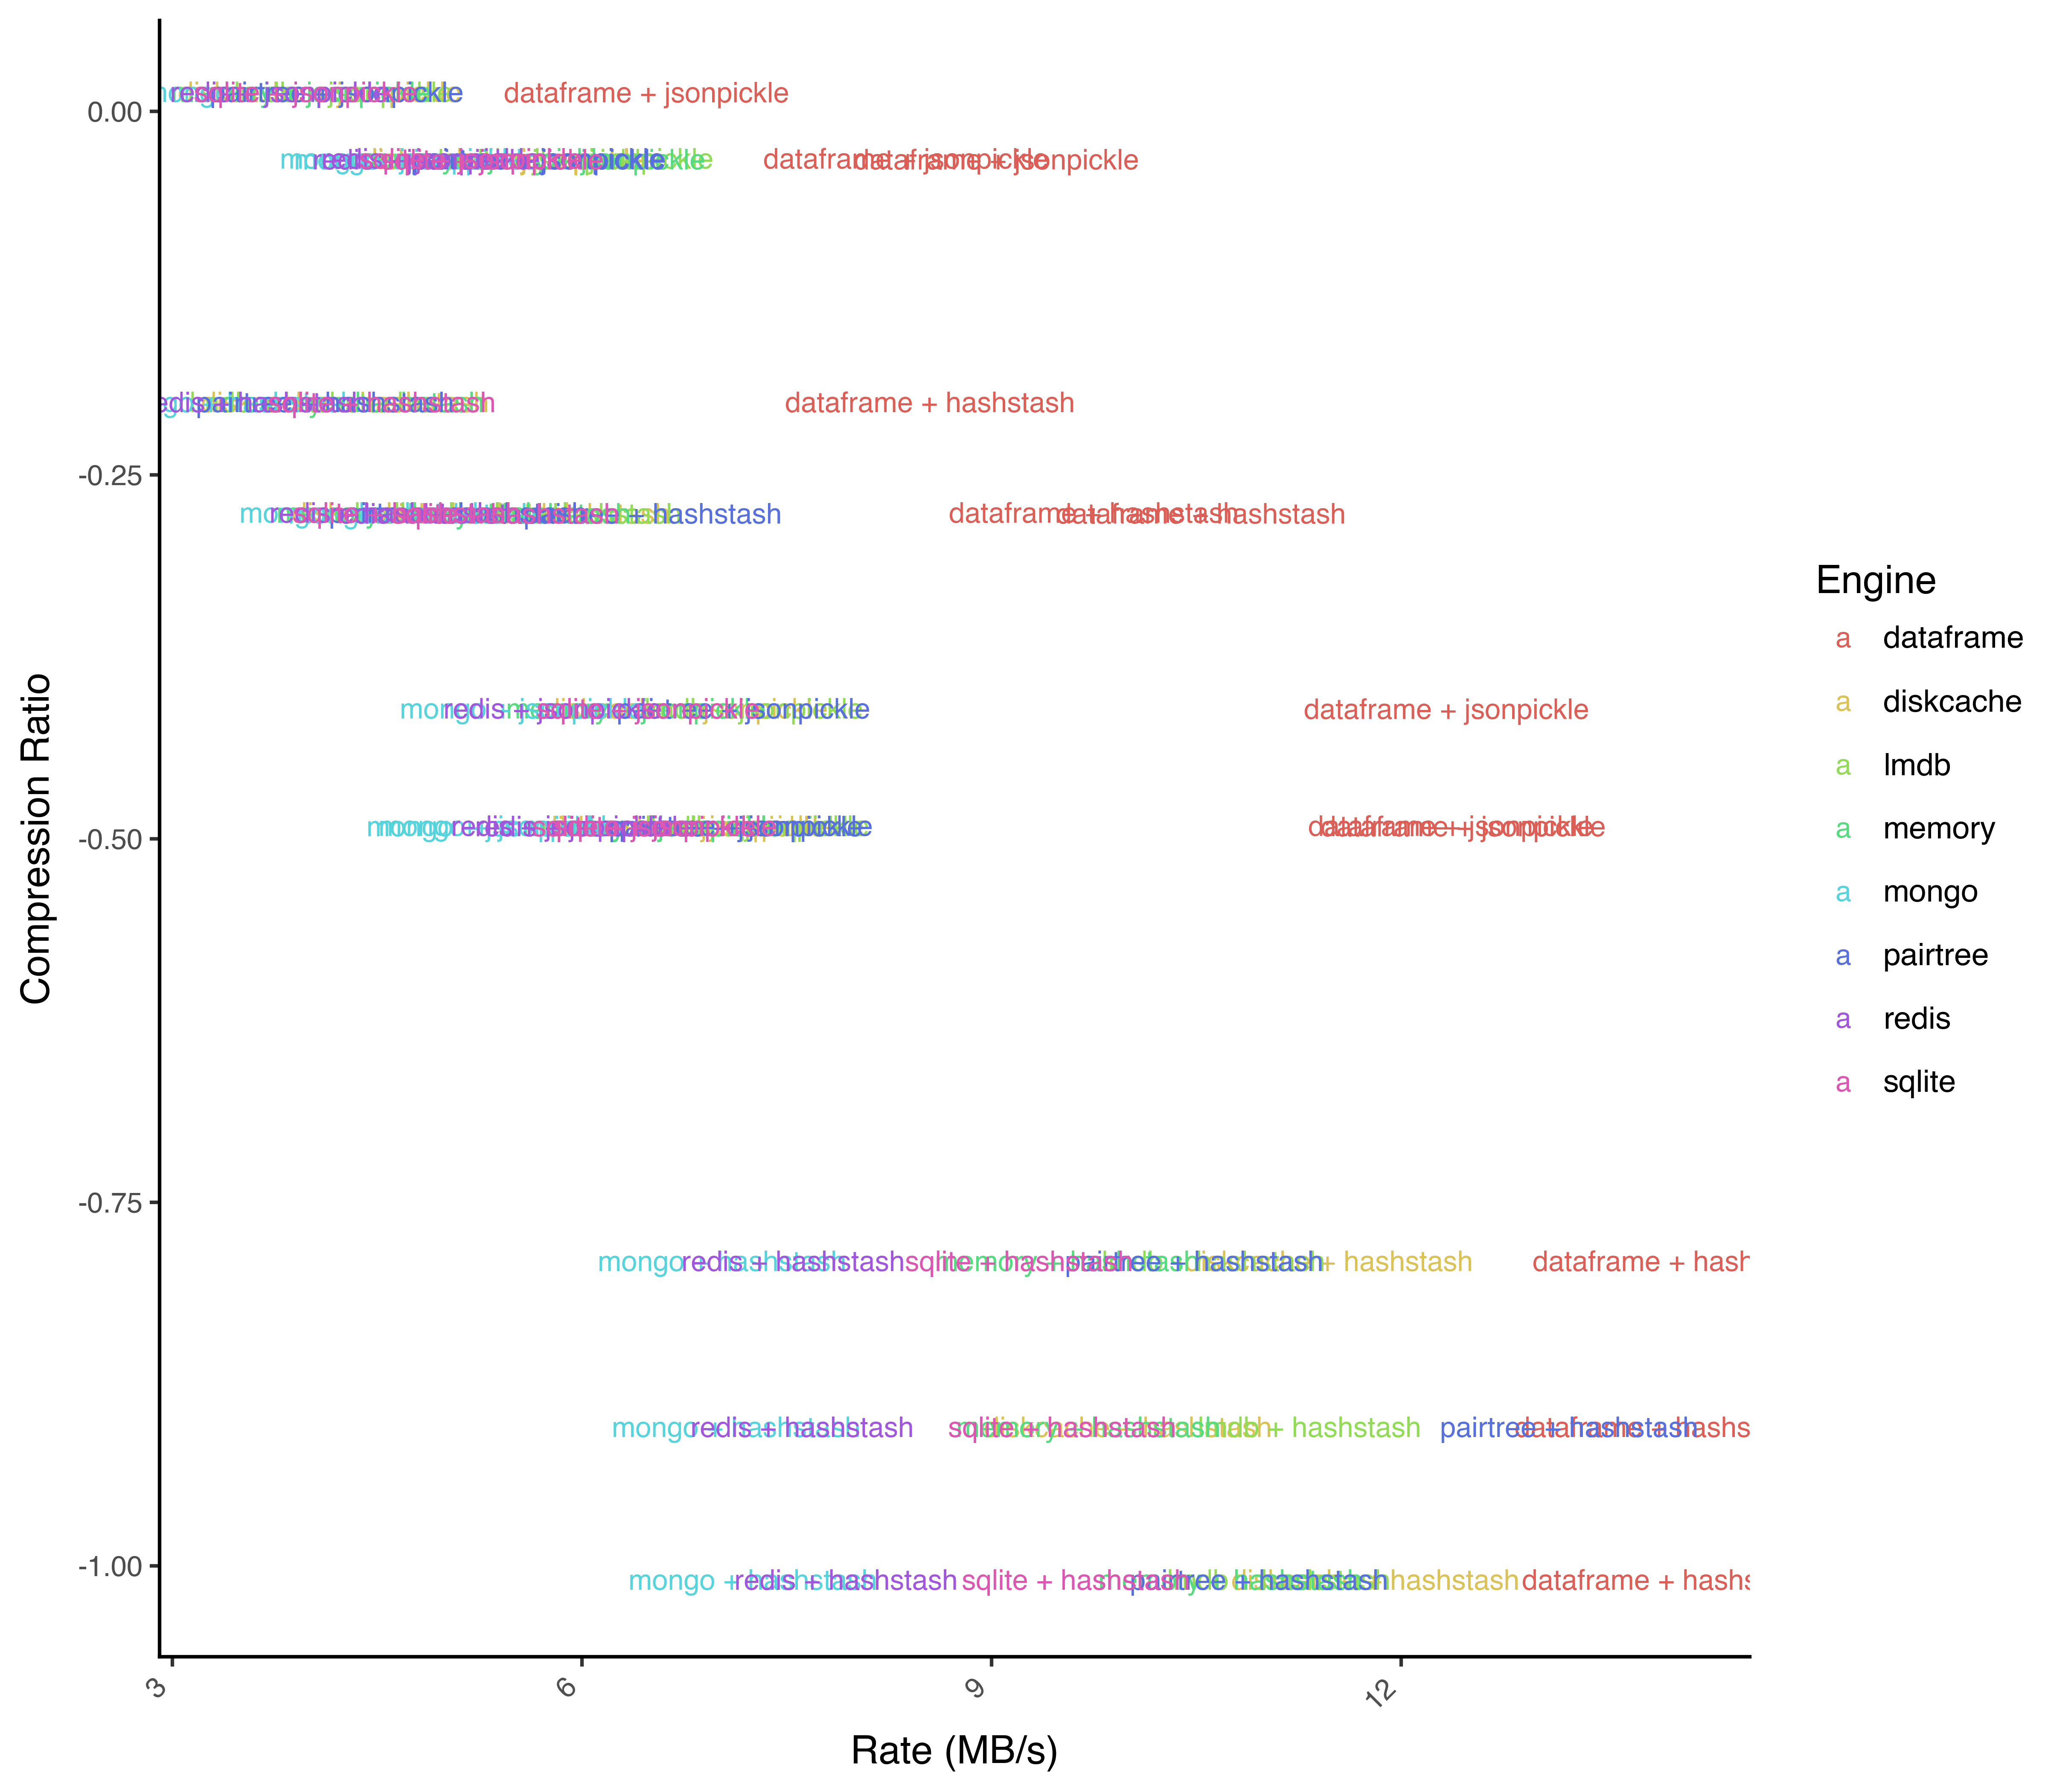

In [153]:
figdf=dfx
dfx['Compression Ratio'] = 1-dfx['Encoded Size (B)'] / dfx['Raw Size (B)']
figdf=figdf[figdf.Serializer!="pickle"]
# figdf=figdf[figdf.Engine!="dataframe"]
# figdf=figdf[figdf.Encoding.isin({"lz4+b64","raw+b64"})]
fig=p9.ggplot(figdf, p9.aes(x='Rate (MB/s)', y='Compression Ratio', color='Engine', label='Label')) + p9.geom_text(size=8) + p9.theme_classic() + p9.labs() + p9.theme(axis_text_x=p9.element_text(angle=45, hjust=1, size=8), axis_text_y=p9.element_text(size=8))
# fig+=p9.scale_y_continuous(limits=(0,35))
# fig+=p9.scale_x_continuous(limits=(0,35))
# fig+=p9.scale_y_log10()
# fig+=p9.scale_x_log10()
# fig += p9.geom_abline(slope=1, intercept=0, linetype='dashed', color='gray')
fig

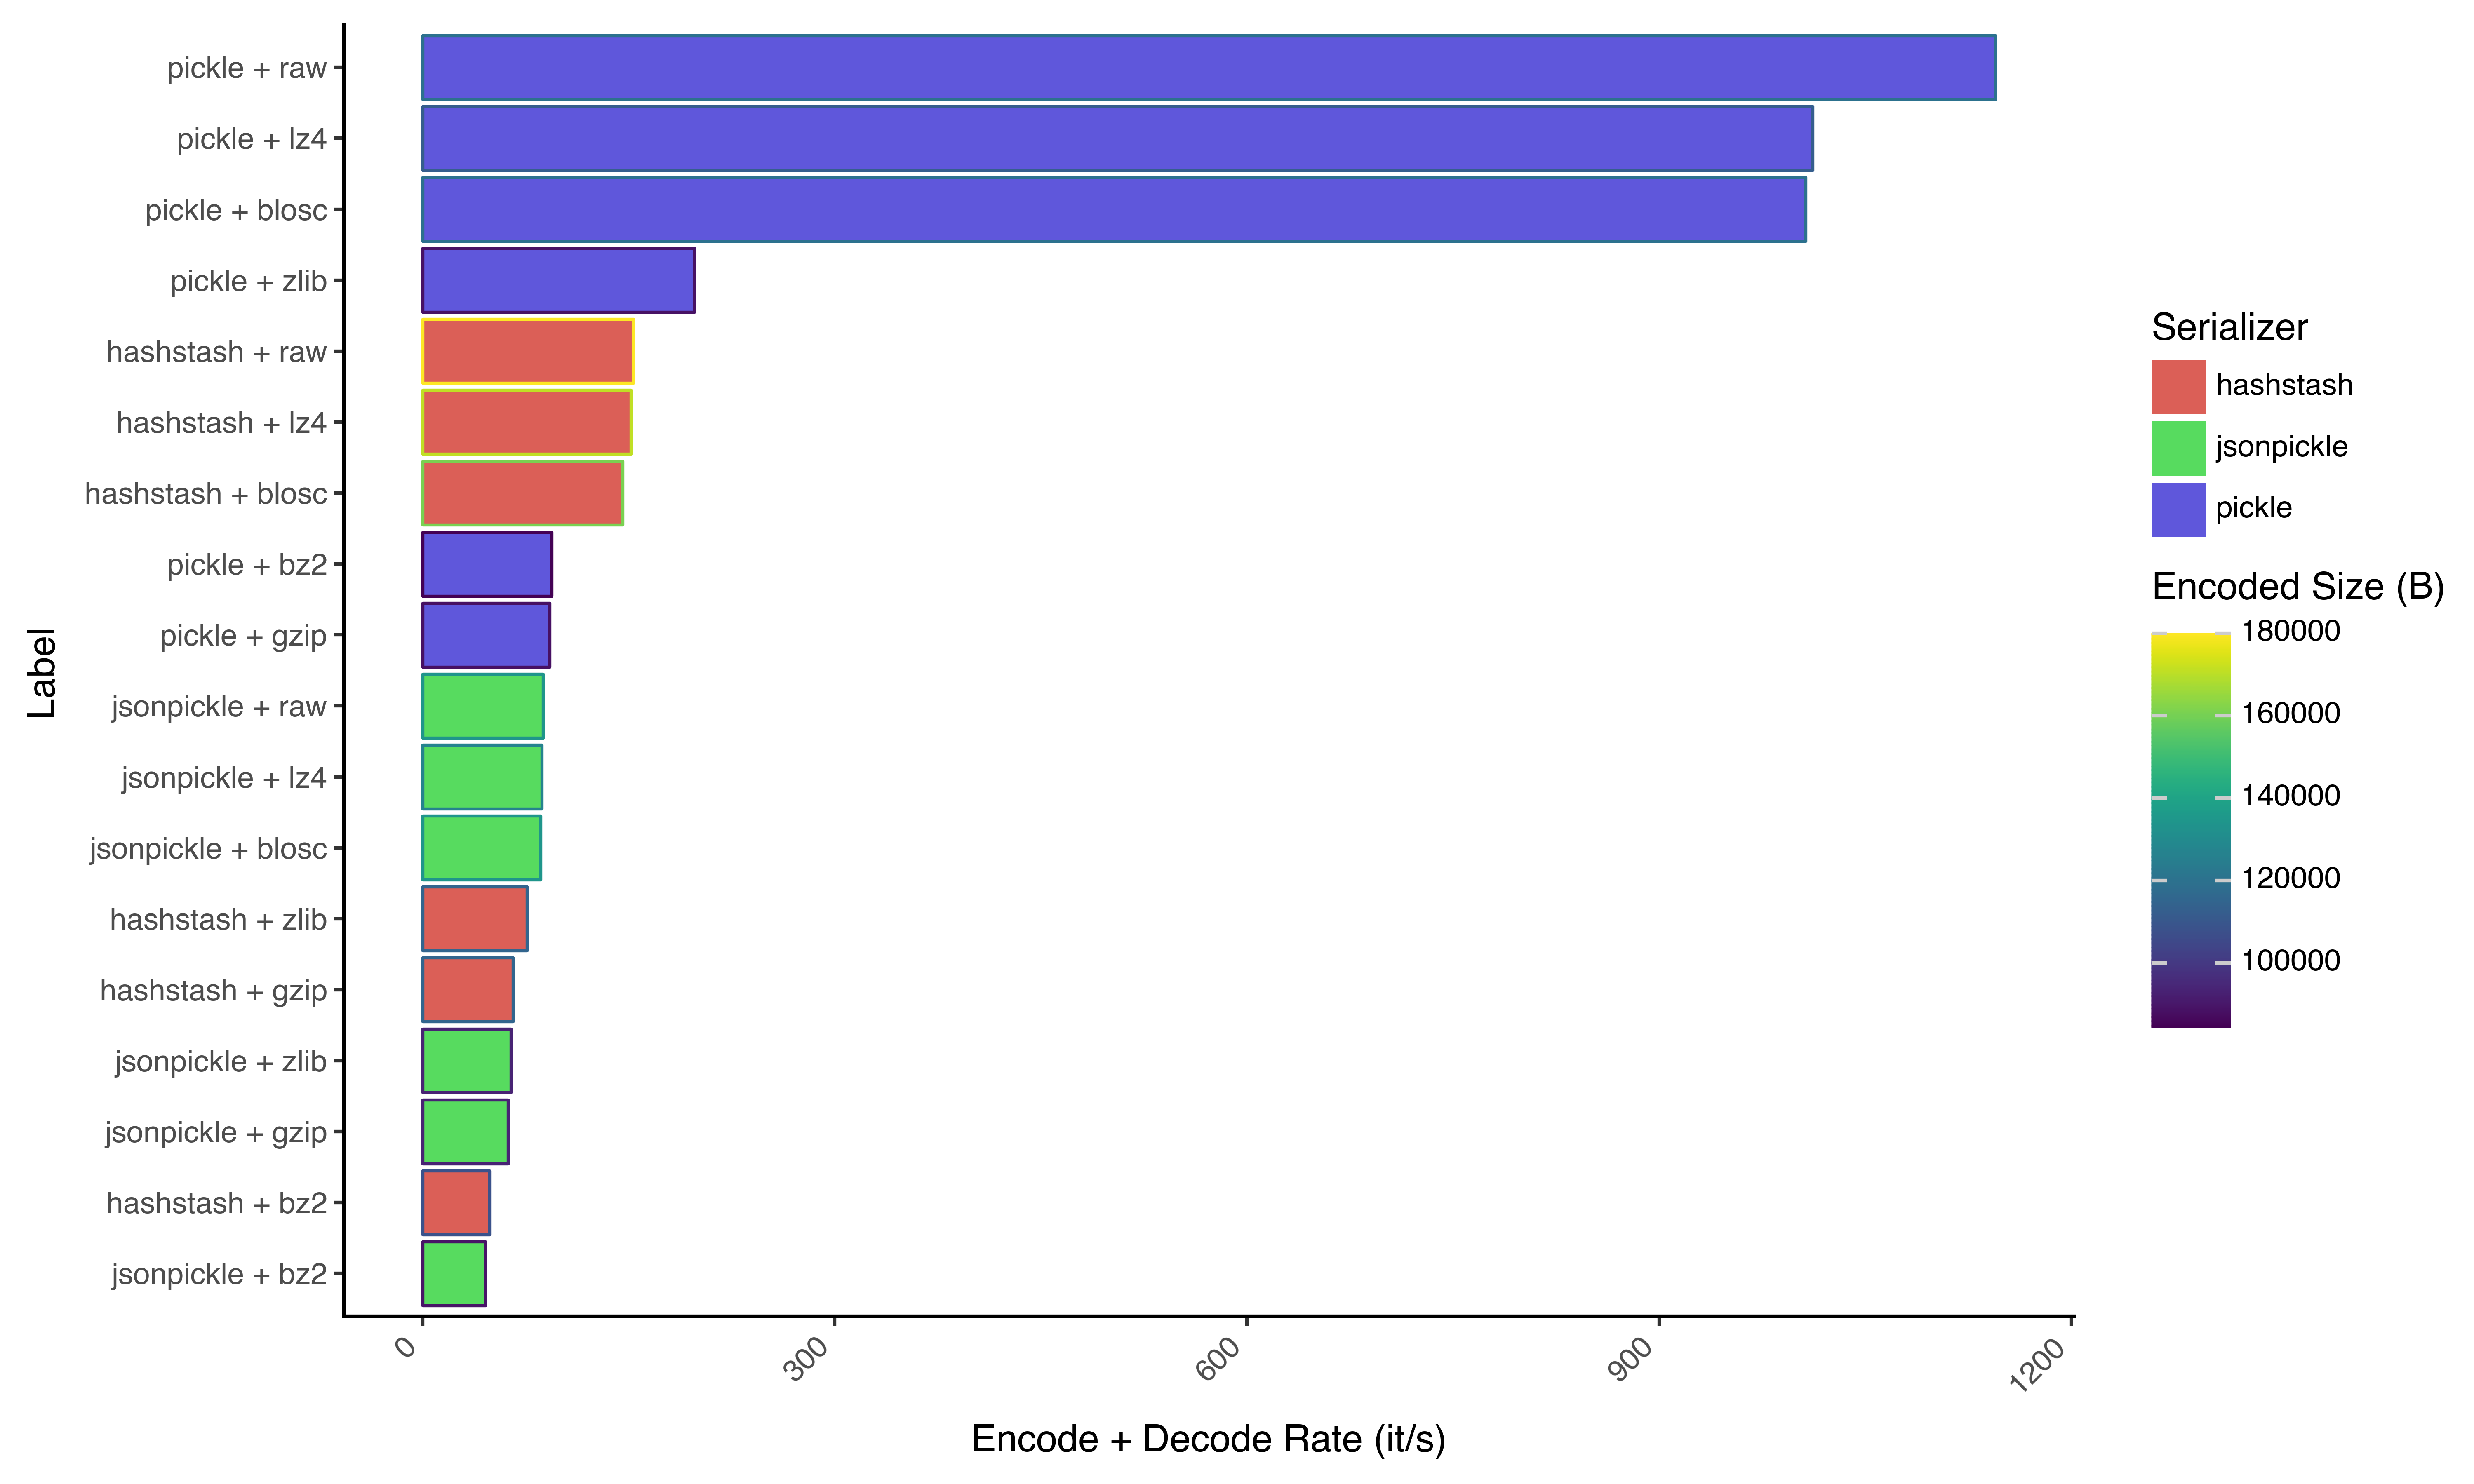

In [33]:
import plotnine as p9
import pandas as pd
df['Label'] = df['Serializer'] + ' + ' + df['Encoding']
# Sort the DataFrame by 'Encode + Decode Rate (it/s)' in descending order
df = df.sort_values('Encode + Decode Rate (it/s)', ascending=True)

# Create the 'Label' column as a Categorical with the sorted order
df['Label'] = pd.Categorical(df['Label'], categories=df['Label'].unique())
fig=p9.ggplot(df, p9.aes(x='Label', y='Encode + Decode Rate (it/s)', fill='Serializer', color='Encoded Size (B)')) + p9.geom_bar(stat='identity') + p9.theme_classic() + p9.labs(y='Encode + Decode Rate (it/s)', x='Label') + p9.theme(axis_text_x=p9.element_text(angle=45, hjust=1)) + p9.coord_flip()
fig

In [42]:
HashStashProfiler.plot_encodings(iterations=100)

Profiling 12 stashes:   8%|▊         | 1/12 [00:00<00:09,  1.13it/s]
















In [ ]:
HashStashProfiler.plot_serializers(iterations=iterations)

In [ ]:
HashStashProfiler.plot_engines(iterations=100)